In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

In [13]:
generator = tf.keras.models.load_model('../models/flute_wpgan_nonorm_0726.h5')

In [14]:
noise = tf.random.normal([1, 100])
audio = generator(noise, training=False)

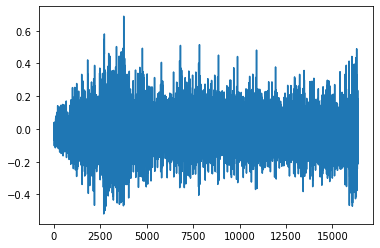

In [21]:
plt.plot(audio[0])

In [22]:
ipd.Audio(audio[0,:,0], rate=16000)

In [105]:
audio_to_write = np.array(audio[0,:,0], dtype=np.float32)
print(audio_to_write.dtype)
sf.write('./generated_audio/flute_wpgan_0725_01.wav', audio_to_write, 16000, subtype='PCM_16')

float32
